In [53]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
from datetime import datetime
# pd.set_printoptions(notebook_repr_html=False)

from pandas import *

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline 
mpl.rc('figure', figsize=(8, 5))
# set_printoptions(max_columns=18)
months = {'JAN' : 1, 'FEB' : 2, 'MAR' : 3, 'APR' : 4, 'MAY' : 5, 'JUN' : 6,
          'JUL' : 7, 'AUG' : 8, 'SEP' : 9, 'OCT': 10, 'NOV': 11, 'DEC' : 12}
of_interest = ['Obama, Barack', 'Romney, Mitt', 'Santorum, Rick', 
               'Paul, Ron', 'Gingrich, Newt']
# set_printoptions(notebook_repr_html=False)
parties = {
  'Bachmann, Michelle': 'Republican',
  'Romney, Mitt': 'Republican',
  'Obama, Barack': 'Democrat',
  "Roemer, Charles E. 'Buddy' III": 'Republican',
  'Pawlenty, Timothy': 'Republican',
  'Johnson, Gary Earl': 'Republican',
  'Paul, Ron': 'Republican',
  'Santorum, Rick': 'Republican',
  'Cain, Herman': 'Republican',
  'Gingrich, Newt': 'Republican',
  'McCotter, Thaddeus G': 'Republican',
  'Huntsman, Jon': 'Republican',
  'Perry, Rick': 'Republican'           
 }
main_cands = ['Obama, Barack', 'Romney, Mitt']
occ_mapping = {
   'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
   'INFORMATION REQUESTED' : 'NOT PROVIDED',
   'INFORMATION REQUESTED (BEST EFFORTS)' : 'NOT PROVIDED'
}

In [6]:
fec = pd.read_pickle('data/fec.pickle')
fec

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt
0,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,250.0,20-JUN-11
1,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,50.0,23-JUN-11
2,"Bachmann, Michelle","SMITH, LANIER",AL,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11
3,"Bachmann, Michelle","BLEVINS, DARONDA",AR,NONE,RETIRED,250.0,01-AUG-11
4,"Bachmann, Michelle","WARDENBURG, HAROLD",AR,NONE,RETIRED,300.0,20-JUN-11
5,"Bachmann, Michelle","BECKMAN, JAMES",AR,NONE,RETIRED,500.0,23-JUN-11
6,"Bachmann, Michelle","BLEVINS, DARONDA",AR,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,21-JUN-11
7,"Bachmann, Michelle","BLEVINS, DARONDA",AR,NONE,RETIRED,250.0,05-JUL-11
8,"Bachmann, Michelle","COLLINS, SARAH",AZ,ST. JOSEPH HOSPITAL,RN,250.0,21-JUN-11
9,"Bachmann, Michelle","COLEMAN, RONALD",AZ,RAYTHEON,ELECTRICAL ENGINEER,250.0,20-JUN-11


In [7]:
pd.to_datetime(fec.contb_receipt_dt[:1000])

0     2011-06-20
1     2011-06-23
2     2011-07-05
3     2011-08-01
4     2011-06-20
5     2011-06-23
6     2011-06-21
7     2011-07-05
8     2011-06-21
9     2011-06-20
10    2011-06-22
11    2011-06-22
12    2011-06-21
13    2011-06-27
14    2011-07-11
15    2011-07-08
16    2011-06-17
17    2011-07-05
18    2011-06-13
19    2011-06-16
20    2011-06-16
21    2011-06-16
22    2011-06-17
23    2011-06-17
24    2011-08-05
25    2011-08-08
26    2011-08-15
27    2011-08-16
28    2011-08-18
29    2011-07-05
         ...    
970   2012-02-29
971   2012-01-17
972   2012-01-17
973   2012-01-10
974   2012-01-19
975   2012-01-30
976   2012-02-22
977   2012-02-29
978   2012-02-29
979   2012-02-29
980   2012-02-01
981   2012-02-29
982   2012-03-20
983   2012-03-14
984   2012-03-07
985   2012-02-28
986   2012-02-16
987   2012-02-21
988   2012-02-22
989   2012-02-13
990   2012-02-22
991   2012-02-28
992   2012-02-06
993   2012-02-01
994   2012-02-06
995   2012-02-20
996   2012-03-20
997   2012-02-

In [8]:
fec.contb_receipt_dt[0]

'20-JUN-11'

In [9]:
datetime(2011, 6, 20)

datetime.datetime(2011, 6, 20, 0, 0)

In [10]:
months = {'JAN' : 1, 'FEB' : 2, 'MAR' : 3, 'APR' : 4, 'MAY' : 5, 'JUN' : 6,
          'JUL' : 7, 'AUG' : 8, 'SEP' : 9, 'OCT': 10, 'NOV': 11, 'DEC' : 12}
def convert_date(datestr):
    d, m, y = datestr.split('-')
    m = months[m]
    return datetime(int('20' + y), m, int(d))

def convert_date2(datestr):
    return datetime.strptime(datestr, '%d-%b-%y')

fec['contb_receipt_dt'] = fec.contb_receipt_dt.map(convert_date)

In [54]:
import pandas.rpy.common as com
tips = com.load_data('tips', 'reshape2')
tips['tip_pct'] = tips.tip / tips.total_bill
tips

ImportError: No module named rpy.common

In [ ]:
tips.pivot_table('tip_pct', rows=['sex', 'smoker'], aggfunc='mean')

In [ ]:
tips.pivot_table('tip_pct', rows=['sex', 'smoker'], aggfunc='mean').unstack('smoker')

In [11]:
by_date = fec.pivot_table('contb_receipt_amt', 
                          index='contb_receipt_dt',
                          columns='cand_nm', 
                          aggfunc='sum')
by_date = by_date[['Obama, Barack', 'Romney, Mitt']]
by_date.tail()

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_dt,,
2012-04-26,537115.38,464335.62
2012-04-27,745269.95,575832.12
2012-04-28,479677.34,64896.50
2012-04-29,349744.69,51038.00
2012-04-30,3499159.38,734803.74


In [12]:
by_date.median()

cand_nm
Obama, Barack    238203.30
Romney, Mitt     119126.52
dtype: float64

In [13]:
mby_date = by_date.resample('M', how='sum', kind='period')
mby_date = mby_date.dropna()
mby_date

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  if __name__ == '__main__':


cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_dt,,
2011-04,8220580.79,2028093.13
2011-05,6537807.79,6748735.75
2011-06,11642949.35,8251436.77
2011-07,3417404.38,2178462.94
2011-08,4620007.79,2273631.53
2011-09,15165839.38,7432453.25
2011-10,5744942.44,3526509.04
2011-11,5076100.31,6814234.46
2011-12,13416086.82,11118778.00


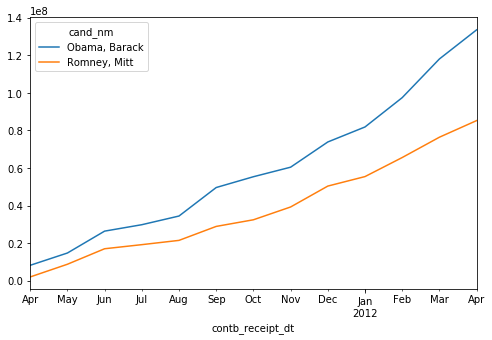

In [14]:
mby_date.cumsum().plot()

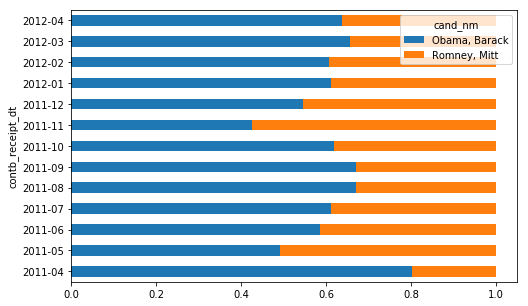

In [15]:
data_normed = mby_date.div(mby_date.sum(1), axis=0)
data_normed.plot(kind='barh', stacked=True)

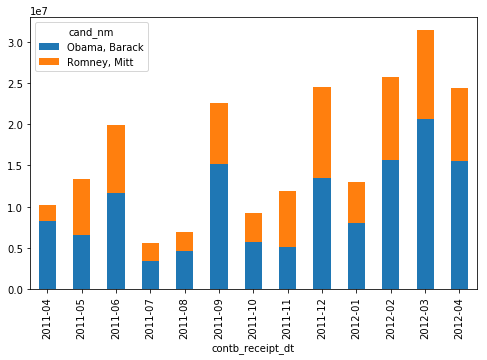

In [16]:
mby_date.plot(kind='bar', stacked=True)

In [17]:
mby_date

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_dt,,
2011-04,8220580.79,2028093.13
2011-05,6537807.79,6748735.75
2011-06,11642949.35,8251436.77
2011-07,3417404.38,2178462.94
2011-08,4620007.79,2273631.53
2011-09,15165839.38,7432453.25
2011-10,5744942.44,3526509.04
2011-11,5076100.31,6814234.46
2011-12,13416086.82,11118778.00


In [18]:
fec.contb_receipt_amt.describe()

count    1.001731e+06
mean     2.982352e+02
std      3.749667e+03
min     -3.080000e+04
25%      3.500000e+01
50%      1.000000e+02
75%      2.500000e+02
max      2.014491e+06
Name: contb_receipt_amt, dtype: float64

In [19]:
def notimpl(self):
    raise TypeError
Categorical.__hash__ = notimpl

In [20]:
#bins = np.array([0, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000])
bins = np.array([0, 1, 10, 100, 1000, 10000])
labels = cut(fec.contb_receipt_amt, bins)
labels

0            (100, 1000]
1              (10, 100]
2            (100, 1000]
3            (100, 1000]
4            (100, 1000]
5            (100, 1000]
6            (100, 1000]
7            (100, 1000]
8            (100, 1000]
9            (100, 1000]
10           (100, 1000]
11           (100, 1000]
12           (100, 1000]
13           (100, 1000]
14           (100, 1000]
15           (100, 1000]
16           (100, 1000]
17           (100, 1000]
18           (100, 1000]
19           (100, 1000]
20           (100, 1000]
21           (100, 1000]
22         (1000, 10000]
23         (1000, 10000]
24           (100, 1000]
25           (100, 1000]
26             (10, 100]
27           (100, 1000]
28           (100, 1000]
29           (100, 1000]
               ...      
1001701    (1000, 10000]
1001702    (1000, 10000]
1001703              NaN
1001704              NaN
1001705      (100, 1000]
1001706    (1000, 10000]
1001707              NaN
1001708    (1000, 10000]
1001709              NaN


In [21]:
fec.groupby(labels).size()

contb_receipt_amt
(0, 1]              758
(1, 10]           49159
(10, 100]        581395
(100, 1000]      296787
(1000, 10000]     63364
dtype: int64

In [37]:
fec = fec[fec.cand_nm.isin(['Obama, Barack', 'Romney, Mitt'])]
labels = cut(fec.contb_receipt_amt, bins)
#fec
fec.groupby(labels).size()

contb_receipt_amt
(0, 1]              570
(1, 10]           43751
(10, 100]        404133
(100, 1000]      197348
(1000, 10000]     48470
dtype: int64

In [38]:
fec.groupby([labels, 'cand_nm']).size()

contb_receipt_amt  cand_nm      
(0, 1]             Obama, Barack       493
                   Romney, Mitt         77
(1, 10]            Obama, Barack     40070
                   Romney, Mitt       3681
(10, 100]          Obama, Barack    372280
                   Romney, Mitt      31853
(100, 1000]        Obama, Barack    153991
                   Romney, Mitt      43357
(1000, 10000]      Obama, Barack     22284
                   Romney, Mitt      26186
dtype: int64

In [39]:
fec.groupby([labels, 'cand_nm']).size().unstack('cand_nm')

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493,77
"(1, 10]",40070,3681
"(10, 100]",372280,31853
"(100, 1000]",153991,43357
"(1000, 10000]",22284,26186


In [40]:
grouped = fec.groupby([labels, 'contb_receipt_dt'])
result = grouped.contb_receipt_amt.sum()
result

contb_receipt_amt  contb_receipt_dt
(0, 1]             2011-04-20                1.00
                   2011-04-26                1.00
                   2011-05-28                1.00
                   2011-06-14                1.00
                   2011-06-21                1.00
                   2011-06-23                1.00
                   2011-06-28                1.00
                   2011-07-13                0.40
                   2011-07-26                0.40
                   2011-07-28                1.00
                   2011-08-12                0.40
                   2011-08-21                0.40
                   2011-08-22                0.40
                   2011-08-23                1.40
                   2011-08-24                2.00
                   2011-08-25                1.00
                   2011-08-28                1.00
                   2011-09-06                1.40
                   2011-09-14                0.80
              

In [41]:
result = result.unstack('contb_receipt_amt')
result

contb_receipt_amt,"(0, 1]","(1, 10]","(10, 100]","(100, 1000]","(1000, 10000]"
contb_receipt_dt,,,,,
2011-04-04,NaN,612.00,72908.12,310275.00,264690.00
2011-04-05,NaN,117.00,15560.00,132044.00,160970.00
2011-04-06,NaN,71.00,4579.00,75267.59,167625.00
2011-04-07,NaN,75.00,3773.00,88358.00,160380.00
2011-04-08,NaN,105.00,4506.00,81040.00,210651.00
2011-04-09,NaN,10.00,2324.00,25413.00,78232.00
2011-04-10,NaN,8.00,1639.00,23501.00,75225.00
2011-04-11,NaN,53.00,4519.00,90181.00,359085.00
2011-04-12,NaN,10.00,3482.00,89117.00,404926.46


C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  if __name__ == '__main__':


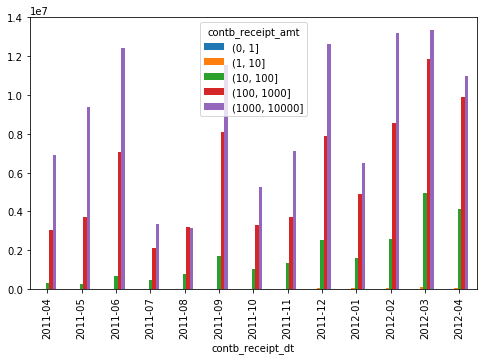

In [43]:
result.resample('M',how ='sum',kind= 'period').plot(kind ='bar')

In [50]:
grouped = fec.groupby([labels, 'cand_nm', 'contb_receipt_dt'])
result = grouped.contb_receipt_amt.sum()
result

contb_receipt_amt  cand_nm        contb_receipt_dt
(0, 1]             Obama, Barack  2011-04-26               1.00
                                  2011-05-28               1.00
                                  2011-06-28               1.00
                                  2011-07-13               0.40
                                  2011-07-26               0.40
                                  2011-07-28               1.00
                                  2011-08-12               0.40
                                  2011-08-21               0.40
                                  2011-08-22               0.40
                                  2011-08-23               1.40
                                  2011-08-24               2.00
                                  2011-08-28               1.00
                                  2011-09-06               0.40
                                  2011-09-14               0.80
                                  2011-09-16         

In [51]:
result = result.unstack(['cand_nm', 'contb_receipt_amt'])
result

cand_nm,"Obama, Barack","Romney, Mitt","Obama, Barack","Romney, Mitt","Obama, Barack","Romney, Mitt","Obama, Barack","Romney, Mitt","Obama, Barack","Romney, Mitt"
contb_receipt_amt,"(0, 1]","(0, 1]","(1, 10]","(1, 10]","(10, 100]","(10, 100]","(100, 1000]","(100, 1000]","(1000, 10000]","(1000, 10000]"
contb_receipt_dt,,,,,,,,,,
2011-04-04,NaN,NaN,612.00,NaN,72908.12,NaN,310275.00,NaN,264690.00,NaN
2011-04-05,NaN,NaN,117.00,NaN,15560.00,NaN,132044.00,NaN,160970.00,NaN
2011-04-06,NaN,NaN,71.00,NaN,4579.00,NaN,75267.59,NaN,167625.00,NaN
2011-04-07,NaN,NaN,75.00,NaN,3773.00,NaN,88358.00,NaN,160380.00,NaN
2011-04-08,NaN,NaN,105.00,NaN,4506.00,NaN,81040.00,NaN,210651.00,NaN
2011-04-09,NaN,NaN,10.00,NaN,2324.00,NaN,25413.00,NaN,78232.00,NaN
2011-04-10,NaN,NaN,8.00,NaN,1639.00,NaN,23501.00,NaN,75225.00,NaN
2011-04-11,NaN,NaN,53.00,NaN,3944.00,575.00,83781.00,6400.00,276585.00,82500.00


C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  if __name__ == '__main__':


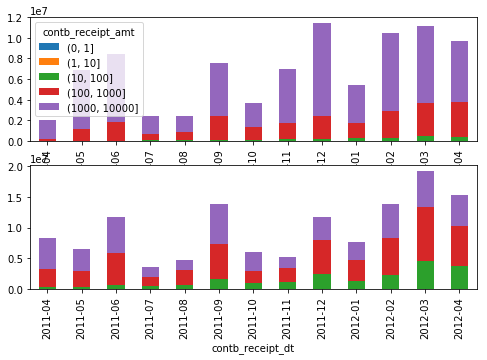

In [54]:
result = result.resample('M', how='sum', kind='period')
mitt = result['Romney, Mitt']
barack = result['Obama, Barack']
fig, axes = plt.subplots(nrows=2, ncols=1)
mitt.plot(kind='bar', stacked=True, ax=axes[0])
barack.plot(kind='bar', stacked=True, ax=axes[1], legend=False)
